# **Background.**

Transjakarta is the first Bus Rapid Transit (BRT) transportation system in Southeast and South Asia operating since 2004 in Jakarta, Indonesia. TransJakarta was designed as a mass transportation mode to support the capital's hectic activities. With the longest track in the world (251.2 km), as well as having 260 bus stops spread across 13 corridors, Transjakarta which initially operates from 05.00 -  22.00 WIB, now operates 24 hours. With increasingly extensive routes and ease of use, Transjakarta has become the leading and favorite transportation for Jakartans. However, this good thing also goes hand in hand with many things that must be handled, including various problems, such as sexual violence that still often occurs to women, accumulation of passengers at bus stops, crowded passengers on the bus, and pickpocketing.

# **Problem Statement.**

Transjakarta wants to evaluate the trip for one month in April 2023, to improve services to passengers.

# **The Data**

This data is passenger data for the month of April 2023. It consists of 37,900 rows and 22 columns as follows:

1.	transID: Unique transaction id for every transaction
2.	payCardID: Customers main identifier. The card customers use as a ticket for entrance and exit.
3.	payCardBank: Customers card bank issuer name
4.	payCardName: Customers name that is embedded in the card.
5.	payCardSex: Customers sex that is embedded in the card
6.	payCardBirthDate: Customers birth year
7.	corridorID: Corridor ID / Route ID as key for route grouping.
8.	corridorName: Corridor Name / Route Name contains Start and Finish for each route.
9.	direction: 0 for Go, 1 for Back. Direction of the route.
10.	tapInStops: Tap In (entrance) Stops ID for identifying stops name
11.	tapInStopsName: Tap In (entrance) Stops Name where customers tap in.
12.	tapInStopsLat: Latitude of Tap In Stops
13.	tapInStopsLon: Longitude of Tap In Stops
14.	stopStartSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
15.	tapInTime: Time of tap in. Date and time
16.	tapOutStops: Tap Out (Exit) Stops ID for identifying stops name
17.	tapOutStopsName: Tap out (exit) Stops Name where customers tap out.
18.	tapOutStopsLat: Latitude of Tap Out Stops
19.	tapOutStopsLon: Longitude of Tap Out Stops
20.	stopEndSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
21.	tapOutTime: Time of tap out. Date and time
22.	payAmount: The number of what customers pay. Some are free. Some not.

In [1]:
import pandas as pd
import numpy as np
import missingno as msn
import seaborn as sns
import folium
from matplotlib import pyplot as plt

In [2]:
#read the data first.

data = pd.read_csv('Transjakarta.csv')
pd.set_option('display.max_columns', None)
data.head(10)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
5,DDES630K2F80KC,2251412124634980,dki,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,0.0,B00127P,Benhil 3,-6.216010,106.81632,3,2023-04-03 05:08:01,B00694P,Grand Sahid,-6.210975,106.82059,6.0,2023-04-03 05:52:25,20000.0
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,Cervino Village,-6.224355,106.85165,25,2023-04-03 06:58:21,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,NaN,NaN,1.0,B03416P,SDN Pondok Labu 11,-6.313269,106.80221,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0
8,OIHS248V7S72EB,6510013988638519,dki,"Cagak Maheswara, S.Sos",F,1992,B14,Bekasi Barat - Kuningan,1.0,B00795P,Imperium,-6.210363,106.83059,1,2023-04-03 06:01:44,B01853P,Kayuringin 2,-6.245948,106.99247,16.0,2023-04-03 06:51:12,20000.0
9,ERXO372B2H63RB,3580401035990896,dki,"T. Dadap Pradana, M.Ak",M,2004,1Q,Rempoa - Blok M,0.0,B05781P,TPU Bungur,-6.247208,106.77889,15,2023-04-03 05:57:47,B06578P,Blok M Jalur 3,-6.243426,106.80188,24.0,2023-04-03 06:51:12,3500.0


# **Data Understanding**

Before analyzing the data further, there is a preliminary step that needs to be carried out, which is data understanding. In this stage, we will identify what anomalies exist and how to address them during the data cleaning process.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [4]:
data.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


In [5]:
data.describe(include='object')

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


# **Unique Value.**

In [6]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in data.columns :
    listItem.append( [col, data[col].nunique(), data[col].unique()])

transjakarta = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Value'],
                     data=listItem)
transjakarta

,Column Name,Number of Unique,Unique Value
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana, 

Based on what is mentioned above, we can see that:

* some columns contain missing values denoted as NaN.
* in the `tapInTime` and `tapOutTime` columns, the data type is still object, so it needs to be converted to datetime first.

# **Duplicated Data.**

In [7]:
data.duplicated().sum()

0

There is no duplicated data on database.

# **Missing Value.**

In [8]:
data.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

The columns that have missing values are `corridorID`, `corridorName`, `tapInStop`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`
`tapOutStopsLon`, `stopEndSeq`, `tapOutTime`, dan `payAmount`. To address missing values, we can either fill them in or delete them if they cannot be filled or are not used for analysis.

<Axes: >

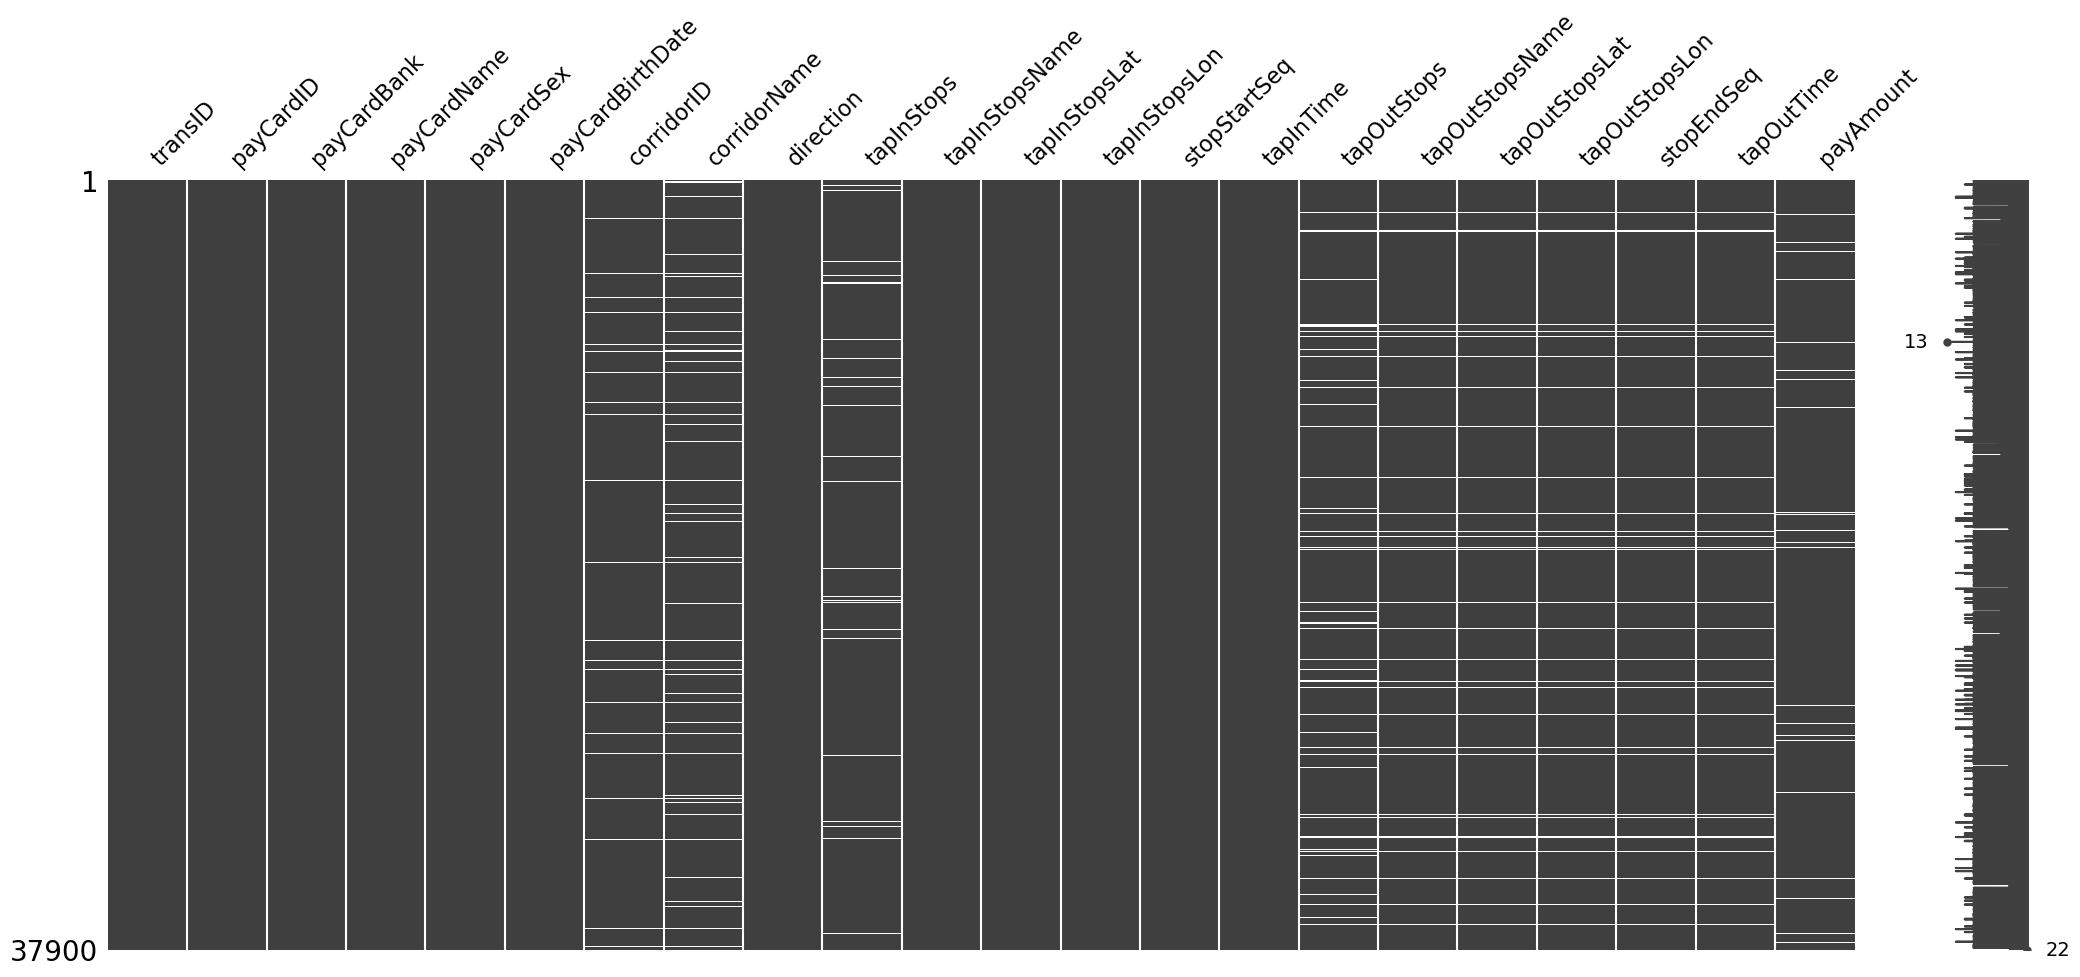

In [9]:
msn.matrix(data)

dari yang bisa kita lihat, kolom yang memiliki missing value nilai NaNnya saling berkaitan. seperti pada kolom corridorID dan corridorName, baris pada corridorName yang memiliki NaN, di baris corridorID juga memiliki NaN.

# **Data Cleaning.**

**Corridor ID.**

* The first method is by mapping corridorName, matching corridorName with corridorID.

In [10]:
corr_ID = data.groupby('corridorName')['corridorID'].apply(lambda k: k.mode()[0]).reset_index()
corr_ID

,corridorName,corridorID
0,Andara - Stasiun Universitas Pancasila,JAK.44
1,BKN - Blok M,M7B
2,BSD - Jelambar,S11
3,BSD Serpong - Fatmawati,S12
4,Batusari - Grogol,8K
...,...,...
211,Terminal Rawamangun - Cipinang Muara,JAK.74
212,Terminal Tanah Merah - Pulo Gadung,JAK.112
213,Terminal Tanjung Priok - Ancol Barat,JAK.88
214,Tongtek - Tebet Eco Park (TEP) - Cililitan,JAK.43B


In [11]:
corrID_mapping = dict(zip(corr_ID['corridorName'], corr_ID['corridorID']))
corrID_mapping

{'Andara - Stasiun Universitas Pancasila': 'JAK.44',
 'BKN - Blok M': 'M7B',
 'BSD - Jelambar': 'S11',
 'BSD Serpong - Fatmawati': 'S12',
 'Batusari - Grogol': '8K',
 'Bekasi Barat - Blok M': 'B13',
 'Bekasi Barat - Kuningan': 'B14',
 'Bekasi Timur - Cawang': 'B21',
 'Bintara - Cipinang Indah': 'JAK.85',
 'Bintaro - Blok M': '8E',
 'Bintaro - Fatmawati': 'S31',
 'Blok M - Andara': 'JAK.31',
 'Blok M - Kota': '1',
 'Blok M - PGC': '7Q',
 'Blok M - Pasar Minggu': '6U',
 'Blok M - Universitas Indonesia': '9H',
 'Bulak Ringin - Kampung Rambutan': 'JAK.38',
 'Bulak Turi - Tanjung Priok': 'JAK.15',
 'Cawang UKI - Lubang Buaya': 'JAK.20',
 'Cempaka Putih - Pulo Gadung via Kelapa Gading': 'JAK.61',
 'Cibubur - BKN': '7C',
 'Cibubur - Balai Kota': '1T',
 'Cibubur - Kuningan': '6P',
 'Cibubur Junction - Blok M': '1K',
 'Cilangkap - Cililitan': 'JAK.36',
 'Ciledug - Tendean': '13',
 'Cililitan - Condet': 'JAK.16',
 'Cililitan - Condet via Kayu Manis': 'JAK.37',
 'Cililitan - Dwikora': 'JAK.21',
 

In [87]:
data['corridorID'] = data.apply(
    lambda row: corrID_mapping[row['corridorName']] 
    if pd.isnull(row['corridorID']) and pd.notnull(row['corridorName'])  
    else row['corridorID'],
    axis=1
)

* The second method is by mapping tapInStopsLat and tapInStopLon.

In [13]:
corr_ID1 = data.groupby(['tapInStopsLat', 'tapInStopsLon'])['corridorID'].apply(lambda z: z.mode().iloc[0] if not z.mode().empty else None).reset_index()
corr_ID1

,tapInStopsLat,tapInStopsLon,corridorID
0,-6.394973,106.822770,D11
1,-6.387532,106.827380,D11
2,-6.387291,106.827300,D11
3,-6.384603,106.829200,D11
4,-6.382532,106.830010,D11
...,...,...,...
2598,-6.093637,106.750680,BW9
2599,-6.093258,106.743790,BW9
2600,-6.091992,106.745990,1A
2601,-6.091746,106.746100,BW9


In [14]:
corrID_mapping1 = dict(zip(zip(corr_ID1['tapInStopsLat'], corr_ID1['tapInStopsLon']), corr_ID1['corridorID']))
corrID_mapping1

{(-6.394973, 106.82277): 'D11',
 (-6.387532, 106.82738): 'D11',
 (-6.387291, 106.8273): 'D11',
 (-6.384603, 106.8292): 'D11',
 (-6.382532, 106.83001): 'D11',
 (-6.381864, 106.86551): 'D11',
 (-6.380018, 106.85409): 'D11',
 (-6.379677, 106.84152): 'D11',
 (-6.379631, 106.84094): 'D11',
 (-6.379606, 106.84312): 'D11',
 (-6.379436, 106.84923): 'D11',
 (-6.379273, 106.84919): 'D11',
 (-6.377369, 106.83281): 'D11',
 (-6.370321, 106.89628): '7C',
 (-6.369769, 106.89298): 'JAK.28',
 (-6.368735, 106.89366): '7C',
 (-6.36869, 106.88971): 'JAK.28',
 (-6.3675, 106.88923): 'JAK.73',
 (-6.365857, 106.88841): 'JAK.28',
 (-6.36178, 106.80714): 'JAK.46',
 (-6.360664, 106.87505): 'JAK.38',
 (-6.360526, 106.87535): 'JAK.38',
 (-6.360054, 106.88891): 'JAK.73',
 (-6.358625, 106.88184): 'JAK.28',
 (-6.358301, 106.87415): 'JAK.38',
 (-6.357133, 106.87444): 'JAK.38',
 (-6.356542, 106.88056): 'JAK.28',
 (-6.354871, 106.80112): 'JAK.47',
 (-6.354808, 106.87871): 'JAK.28',
 (-6.351941, 106.87255): 'JAK.38',
 (-

In [15]:
data['corridorID'] = data.apply(
    lambda row: corrID_mapping1[row['tapInStopsLat'], row['tapInStopsLon']] 
    if pd.isnull(row['corridorID']) and pd.notnull(row['tapInStopsLat']) and pd.notnull(row['tapInStopsLon'])  
    else row['corridorID'],
    axis=1
)

In [16]:
data['corridorID'].isna().sum()

33

**Corridor Name.**

In [17]:
corrName = data.groupby('corridorID')['corridorName'].apply(lambda x: x.mode()[0]).reset_index()
corrName

,corridorID,corridorName
0,1,Blok M - Kota
1,10,Tanjung Priok - PGC 2
2,10A,Rusun Marunda - Tanjung Priok
3,10B,Rusun Cipinang Besar Selatan - Penas Kalimalang
4,10D,Kampung Rambutan - Tanjung Priok
...,...,...
216,S21,Ciputat - CSW
217,S22,Ciputat - Kampung Rambutan
218,S31,Bintaro - Fatmawati
219,T11,Poris Plawad - Bundaran Senayan


In [18]:
corrName_mapping = dict(zip(corrName['corridorID'], corrName['corridorName']))
corrName_mapping

{'1': 'Blok M - Kota',
 '10': 'Tanjung Priok - PGC 2',
 '10A': 'Rusun Marunda - Tanjung Priok',
 '10B': 'Rusun Cipinang Besar Selatan - Penas Kalimalang',
 '10D': 'Kampung Rambutan - Tanjung Priok',
 '10H': 'Tanjung Priok - Blok M',
 '10K': 'Tanjung Priok - Senen via Taman BMW',
 '11': 'Pulo Gebang - Matraman',
 '11B': 'Rusun Rawa Bebek - Penggilingan',
 '11C': 'Rusun Pinus Elok - Rusun Pulo Gebang',
 '11D': 'Pulo Gebang - Pulo Gadung 2 via PIK',
 '11K': 'Rusun Komarudin - Penggilingan',
 '11M': 'Rusun Rawa Bebek - Bukit Duri',
 '11N': 'Rusun Cipinang Muara - Jatinegara',
 '11P': 'Rusun Pondok Bambu - Walikota Jakarta Timur',
 '11Q': 'Kampung Melayu - Pulo Gebang via BKT',
 '12': 'Tanjung Priok - Pluit',
 '12A': 'Pelabuhan Kaliadem - Kota',
 '12B': 'Pluit - Senen',
 '12C': 'Rusun Waduk Pluit - Penjaringan',
 '12F': 'Rusun Marunda - Rusun Waduk Pluit',
 '12H': 'Rusun Penjaringan - Penjaringan',
 '12P': 'St. LRT Pegangsaan Dua - JIS',
 '13': 'Ciledug - Tendean',
 '13B': 'Puri Beta - Panc

In [19]:
data['corridorName'] = data.apply(
    lambda row: corrName_mapping[row['corridorID']] 
    if pd.isnull(row['corridorName']) and pd.notnull(row['corridorID'])  
    else row['corridorName'],
    axis=1
)

In [20]:
data['corridorName'].isna().sum()

33

After filling in, the remaining NaN values for corridorName are 33.

**tapInStops.**

* Using the same method, NaN values in the tapInStops column can be filled by mapping with tapInStopsName.

In [21]:
TIS_ID = data.groupby('tapInStopsName')['tapInStops'].apply(lambda i: i.mode().iloc[0] if not i.mode().empty else None).reset_index()
TIS_ID

,tapInStopsName,tapInStops
0,18 Office Park,B00001P
1,ACC Simatupang,B00004P
2,ACE Hardware,B00005P
3,AKR Tower,B00018P
4,ASEAN,P00004
...,...,...
2597,Yayasan Nurul Ihsan Pulo Gebang,B05926P
2598,Yayasan Perguruan Rakyat 2,B05929P
2599,Yon Arhanud - 10 Pesanggrahan,B05933P
2600,Yos Sudarso Kodamar,P00274


In [22]:
TIS_mapping = dict(zip(TIS_ID['tapInStopsName'], TIS_ID['tapInStops']))
TIS_mapping

{'18 Office Park': 'B00001P',
 'ACC Simatupang': 'B00004P',
 'ACE Hardware': 'B00005P',
 'AKR Tower': 'B00018P',
 'ASEAN': 'P00004',
 'ASMI': 'P00005',
 'Adam Malik': 'P00001',
 'Adam Malik 1': 'B00008P',
 'Ahmad Yani Bea Cukai': 'P00002',
 'Akper Fatmawati Pondok Labu': 'B00017P',
 'Al Izhar Pondok Labu 2': 'B00027P',
 'Al Khairiyah School': 'B00028P',
 'Al Mukhlisin': 'B00030P',
 'Al Wathoniyah 1': 'B00031P',
 'Al Wathoniyah 2': 'B00032P',
 'Al-Wathoniyah': 'B06709P',
 'Allianz': 'B00034P',
 'Ambassador': 'B02183P',
 'Ampera 1': 'B00035P',
 'Ampera 2': 'B00036P',
 'Ampera 3': 'B00037P',
 'Ampera Garden': 'B00039P',
 'Ampera Yos Sudarso': 'B00040P',
 'Ananda Pulo Gadung': 'B00041P',
 'Ancol': 'P00003',
 'Ancol Pintu 2': 'B06000P',
 'Andara Margasatwa 2': 'B00043P',
 'Andara Margasatwa 3': 'B00044P',
 'Andara Margasatwa 4': 'B00045P',
 'Aneka Apotek': 'B00046P',
 'Aneka PIK Penggilingan': 'B00048P',
 'Antena III': 'B00052P',
 'Apartemen Kedoya Elok 2': 'B00056P',
 'Apartemen Simprug Te

In [23]:
data['tapInStops'] = data.apply(
    lambda row: TIS_mapping[row['tapInStopsName']] 
    if pd.isnull(row['tapInStops']) and pd.notnull(row['tapInStopsName'])  
    else row['tapInStops'],
    axis=1
)

* Mapping with tapInStopLat and tapInStopsLon.

In [24]:
TIS_ID1 = data.groupby(['tapInStopsLat', 'tapInStopsLon'])['tapInStops'].apply(lambda s: s.mode().iloc[0] if not s.mode().empty else None).reset_index()
TIS_ID1

,tapInStopsLat,tapInStopsLon,tapInStops
0,-6.394973,106.822770,B00106P
1,-6.387532,106.827380,B00005P
2,-6.387291,106.827300,B00287P
3,-6.384603,106.829200,B00420P
4,-6.382532,106.830010,B02822P
...,...,...,...
2598,-6.093637,106.750680,B06040P
2599,-6.093258,106.743790,B06043P
2600,-6.091992,106.745990,B06042P
2601,-6.091746,106.746100,B06049P


In [25]:
TIS_mapping1 = dict(zip(zip(TIS_ID1['tapInStopsLat'], TIS_ID1['tapInStopsLon']), TIS_ID1['tapInStops']))
TIS_mapping1

{(-6.394973, 106.82277): 'B00106P',
 (-6.387532, 106.82738): 'B00005P',
 (-6.387291, 106.8273): 'B00287P',
 (-6.384603, 106.8292): 'B00420P',
 (-6.382532, 106.83001): 'B02822P',
 (-6.381864, 106.86551): 'B00805P',
 (-6.380018, 106.85409): 'B02055P',
 (-6.379677, 106.84152): 'B02473P',
 (-6.379631, 106.84094): 'B02472P',
 (-6.379606, 106.84312): 'B02823P',
 (-6.379436, 106.84923): 'B00551P',
 (-6.379273, 106.84919): 'B03563P',
 (-6.377369, 106.83281): 'B05521P',
 (-6.370321, 106.89628): 'B00226P',
 (-6.369769, 106.89298): 'B04538P',
 (-6.368735, 106.89366): 'B00248P',
 (-6.36869, 106.88971): 'B05651P',
 (-6.3675, 106.88923): 'B00662P',
 (-6.365857, 106.88841): 'B02060P',
 (-6.36178, 106.80714): 'B01048P',
 (-6.360664, 106.87505): 'B04114P',
 (-6.360526, 106.87535): 'B02512P',
 (-6.360054, 106.88891): 'B04583P',
 (-6.358625, 106.88184): 'B00487P',
 (-6.358301, 106.87415): 'B04092P',
 (-6.357133, 106.87444): 'B05379P',
 (-6.356542, 106.88056): 'B01352P',
 (-6.354871, 106.80112): 'B04331P'

In [26]:
data['tapInStops'] = data.apply(
    lambda row: TIS_mapping1[row['tapInStopsLat'], row['tapInStopsLon']] 
    if pd.isnull(row['tapInStops']) and pd.notnull(row['tapInStopsLat']) and pd.notnull(row['tapInStopsLon'])  
    else row['tapInStops'],
    axis=1
)

In [27]:
data['tapInStops'].isna().sum()

34

After filling with two methods, there are still 34 NaN values in the tapInStops column.

**tapOutStops.**

* Filled NaN values in the tapOutStops column by mapping with tapOutStopsName.

In [28]:
TOS_ID = data.groupby('tapOutStopsName')['tapOutStops'].apply(lambda o: o.mode().iloc[0] if not o.mode().empty else None).reset_index()
TOS_ID

,tapOutStopsName,tapOutStops
0,ABA,B00002P
1,ACC Simatupang,B00004P
2,ACE Hardware,B00005P
3,ASEAN,P00004
4,ASMI,P00005
...,...,...
2243,Yayasan Perguruan Rakyat 2,B05929P
2244,Yon Arhanud - 10 Pesanggrahan,B05933P
2245,Yos Sudarso Kodamar,P00274
2246,Yos Sudarso Kodamar 1,B05934P


In [29]:
TOS_mapping = dict(zip(TOS_ID['tapOutStopsName'], TOS_ID['tapOutStops']))
TOS_mapping

{'ABA': 'B00002P',
 'ACC Simatupang': 'B00004P',
 'ACE Hardware': 'B00005P',
 'ASEAN': 'P00004',
 'ASMI': 'P00005',
 'ASMI 2': 'B00070P',
 'ASSA': 'B06010P',
 'AURI Jatibaru': 'B00086P',
 'Acacia Residence': 'B00003P',
 'Adam Malik': 'P00001',
 'Ahmad Yani Bea Cukai': 'P00002',
 'Ahmad Yani Bea Cukai 1': 'B06534P',
 'Ahmad Yani Pisangan Baru': 'B00013P',
 'Akademi Farmasi Mahadhika': 'B00015P',
 'Akses Jembatan Ciliwung Balekambang': 'B00022P',
 'Al Khairiyah School': 'B00028P',
 'Al Mahbubiyah': 'B00029P',
 'Al Mukhlisin': 'B00030P',
 'Al-Wathoniyah': 'B06709P',
 'Allianz': 'B00034P',
 'Ambassador': 'B02183P',
 'Ampera 1': 'B00035P',
 'Ampera 2': 'B00036P',
 'Ampera 4': 'B00038P',
 'Ancol': 'P00003',
 'Andara Margasatwa 1': 'B00042P',
 'Antena II': 'B00053P',
 'Apartemen Simprug Teras': 'B00058P',
 'Apotik Rini Rawamangun': 'B00060P',
 'Arsip Nasional RI 1': 'B00066P',
 'Arsip Nasional RI 2': 'B00067P',
 'Asrama Marinir Marunda 2': 'B00074P',
 'Asshomadiyah Medicare Centre 2': 'B00077

In [30]:
data['tapOutStops'] = data.apply(
    lambda row: TOS_mapping[row['tapOutStopsName']] 
    if pd.isnull(row['tapOutStops']) and pd.notnull(row['tapOutStopsName'])  
    else row['tapOutStops'],
    axis=1
)

In [31]:
data['tapOutStops'].isna().sum()

1363

**payAmount.**

In [32]:
data['payAmount'].unique()

array([ 3500., 20000.,     0.,    nan])

In the data, there are 3 unique values in the payAmount column, indicating there are 3 different fares for Transjakarta. According to the [source](https://transjakarta.co.id/faq-transjakarta/), here is the distribution:

* 20,000 for Royaltrans.
* 3,500 for Reguler.
* 0 for Mikrotrans.

* Let's start with Royaltrans first. Based on this [web](https://transjakarta.co.id/peta-rute/), buses with corridorID 1K, 1T, 1U, 6P, B13, B14, D31, D32, S12, S13, S14, and S31 are Royaltrans.

In [33]:
royaltrans = ['1K', '1T', '1U', '6P', 'B13', 'B14', 'D31', 'D32', 'S12', 'S13', 'S14', 'S31']
royaltrans

['1K',
 '1T',
 '1U',
 '6P',
 'B13',
 'B14',
 'D31',
 'D32',
 'S12',
 'S13',
 'S14',
 'S31']

In [34]:
data.loc[data['corridorID'].isin(royaltrans), 'payAmount'] = 20000

* Then fill in 0 rupiah for Mikrotrans, where the corridorID begins with "JAK".

In [35]:
data.loc[data['corridorID'].str.startswith('JAK', na=False), 'payAmount'] = 0

* Last, fill the remaining empty rows with 3,500.

In [36]:
data['payAmount'].fillna(3500, inplace=True)

In [37]:
data['payAmount'].isna().sum()

0

All NaN values in the payAmount column have been replaced with their actual values.

Let's check current missing value.

In [38]:
data.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1363
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount              0
dtype: int64

# **Drop Missing Value**

After trying to replace the NaN values by filling with the actual or the closest value, there are still some NaN values left. These NaN values will be dropped or deleted because there is no other way to replace them.

In [39]:
data.dropna(subset=['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime'], inplace=True)

In [40]:
data.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

There are no NaN values left.

# **Outlier.**

Besides missing values, there are also outliers that we can detect, perhaps there are values that do not make sense in the data.

In [41]:
numeric = data.select_dtypes(include= 'number')
numeric

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
0,180062659848800,2008,1.0,-6.184631,106.84402,7,-6.203101,106.85715,12.0,3500.0
1,4885331907664776,1997,0.0,-6.228700,106.83302,13,-6.217152,106.81892,21.0,3500.0
2,4996225095064169,1992,0.0,-6.133132,106.81435,38,-6.133731,106.81475,39.0,3500.0
3,639099174703,1978,0.0,-6.195743,106.93526,23,-6.183068,106.93194,29.0,3500.0
4,570928206772,1982,0.0,-6.149650,106.88900,5,-6.135355,106.81143,15.0,3500.0
...,...,...,...,...,...,...,...,...,...,...
37895,4685818286724028395,2004,1.0,-6.196892,106.82309,2,-6.290967,106.82365,13.0,3500.0
37896,6502902290603767,1974,1.0,-6.290154,106.88116,1,-6.291075,106.88634,2.0,3500.0
37897,213159426675861,1976,1.0,-6.216247,106.81676,12,-6.370321,106.89628,14.0,20000.0
37898,377840859133591,1976,1.0,-6.188656,106.80954,33,-6.188861,106.81135,34.0,0.0


to detect outliers, we can use IQR method.

In [88]:
def calculate_stats(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return pd.Series({'Q1': Q1, 'Q3': Q3, 'IQR': IQR, 'Lower Bound': lower_bound, 'Upper Bound': upper_bound})

stats_table = numeric.apply(calculate_stats)
stats_table

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
Q1,1.800407e+14,1982.0,0.0,-6.245863,106.80347,4.0,-6.247225,106.80175,11.0,0.0
Q3,4.693230e+15,2001.0,1.0,-6.175579,106.88227,19.0,-6.174736,106.88303,29.0,3500.0
IQR,4.513189e+15,19.0,1.0,0.070284,0.07880,15.0,0.072489,0.08128,18.0,3500.0
Lower Bound,-6.589743e+15,1953.5,-1.5,-6.351289,106.68527,-18.5,-6.355958,106.67983,-16.0,-5250.0
Upper Bound,1.146301e+16,2029.5,2.5,-6.070153,107.00047,41.5,-6.066002,107.00495,56.0,8750.0


In [89]:
Q1 = numeric.quantile(0.25)
Q3 = numeric.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (numeric < lower_bound) | (numeric > upper_bound)
outliers

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
37895,True,False,False,False,False,False,False,False,False,False
37896,False,False,False,False,False,False,False,False,False,False
37897,False,False,False,False,False,False,True,False,False,True
37898,False,False,False,False,False,False,False,False,False,False


**Explaination.**

* A value can be said to be outliers if its value is smaller than the lower bound and larger than the upper bound.

* In the payCardBirthDate column, has a lower bound value of 1953 and after tracing, there are several passengers born before 1953 who are included in the elderly age group.

* The payAmount column has a lower bound value of -5250 and an upper bound value of 8750. outliers below the lower bound cannot exist because they are negative (payments cannot be minus), while above the upper bound it is certain that there is a value of 20,000, which we already know is the amount of payment for Royaltrans.

# **Data Formatting.**

Previously in the data understanding section, it was found that there are still columns whose data types do not match, namely tapInTime and tapOutTime, so in this section we will change them to datetime data types.

In [44]:
data['tapInTime'] = pd.to_datetime(data['tapInTime'])
data['tapOutTime'] = pd.to_datetime(data['tapOutTime'])

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36474 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           36474 non-null  object        
 1   payCardID         36474 non-null  int64         
 2   payCardBank       36474 non-null  object        
 3   payCardName       36474 non-null  object        
 4   payCardSex        36474 non-null  object        
 5   payCardBirthDate  36474 non-null  int64         
 6   corridorID        36474 non-null  object        
 7   corridorName      36474 non-null  object        
 8   direction         36474 non-null  float64       
 9   tapInStops        36474 non-null  object        
 10  tapInStopsName    36474 non-null  object        
 11  tapInStopsLat     36474 non-null  float64       
 12  tapInStopsLon     36474 non-null  float64       
 13  stopStartSeq      36474 non-null  int64         
 14  tapInTime         3647

# **Analysis.**

After cleaning the data and change the format, finally this data is ready to use.

In [46]:
data

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


**Passengers Distribution.**

* **Based on gender.**

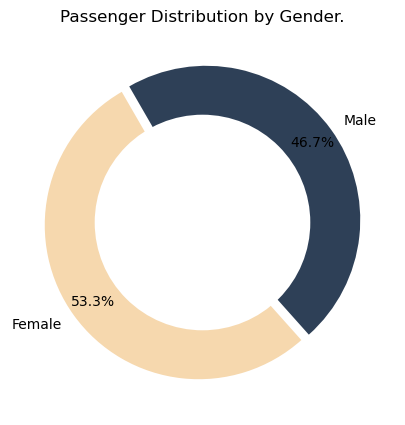

In [47]:
import matplotlib.pyplot as plt

categories = ['Female', 'Male']
values = data['payCardSex'].value_counts()
explode = (0.03, 0.03)

# Make the pie chart.
plt.figure(figsize=(8, 5))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=120, colors=['#f6d8ae','#2e4057'], pctdistance=0.85, explode=explode)

# Draw circle.
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart.
fig.gca().add_artist(centre_circle)

plt.title('Passenger Distribution by Gender.')
plt.show()


* **Based on age.**

In [48]:
def ageClasification(x):
    if x > 2011:
        return 'Child'
    elif 2011 >= x >= 1998:
        return 'Teenager'
    elif 1997 >= x >= 1978:
        return 'Adult'
    else:
        return 'Elderly'
    
data['ageClasification'] = data['payCardBirthDate'].apply(ageClasification)

In [49]:
birthdate = data['ageClasification'].value_counts().reset_index()
birthdate

,index,ageClasification
0,Adult,19747
1,Teenager,10061
2,Elderly,5891
3,Child,775


In [50]:
birthdate.columns = ['ageClasification', 'count']
birthdate

,ageClasification,count
0,Adult,19747
1,Teenager,10061
2,Elderly,5891
3,Child,775


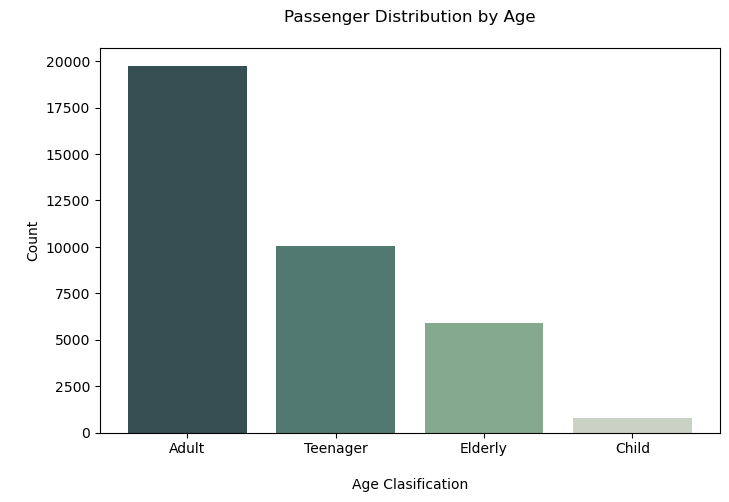

In [51]:
plt.figure(figsize=(8,5))

# create bar plot
plt.bar(birthdate['ageClasification'], birthdate['count'], color=['#354F52', '#52796F', '#84A98C', '#CAD2C5'])

plt.xlabel('\nAge Clasification', size=10)
plt.ylabel('\nCount', size=10)
plt.title('Passenger Distribution by Age\n', size=12)
plt.show()

* **Based on card they use.**

In [52]:
data['payCardBank'].value_counts()

dki       18015
emoney     6625
brizzi     3390
flazz      3101
online     2765
bni        2578
Name: payCardBank, dtype: int64

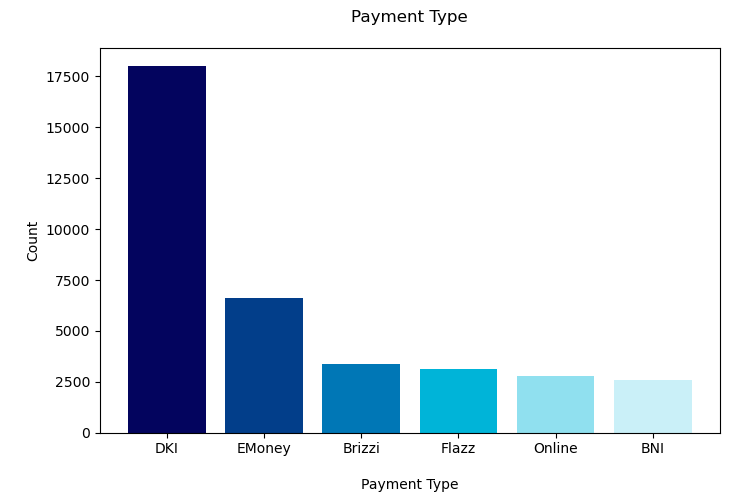

In [53]:
count = data['payCardBank'].value_counts()
plt.figure(figsize=(8,5))

# create bar plot
plt.bar(['DKI', 'EMoney', 'Brizzi', 'Flazz', 'Online', 'BNI'], count, color=['#03045E', '#023E8A', '#0077B6', '#00B4D8', '#90E0EF', '#CAF0F8'])

plt.xlabel('\nPayment Type', size=10)
plt.ylabel('\nCount', size=10)
plt.title('Payment Type\n', size=12)
plt.show()

In [54]:
user_by_age = data.groupby(['payCardBank', 'ageClasification'])['ageClasification'].count().reset_index(name='counts')
user_by_age

,payCardBank,ageClasification,counts
0,bni,Adult,1447
1,bni,Child,178
2,bni,Elderly,201
3,bni,Teenager,752
4,brizzi,Adult,2004
5,brizzi,Child,41
6,brizzi,Elderly,471
7,brizzi,Teenager,874
8,dki,Adult,9676
9,dki,Child,248


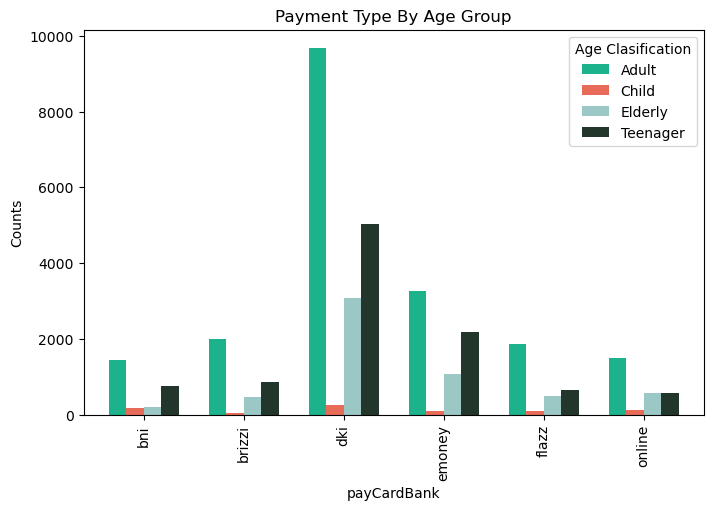

In [90]:
pivot_df = user_by_age.pivot(index='payCardBank', columns='ageClasification', values='counts')

ax = pivot_df.plot(kind='bar', color=['#1BB28C', '#E86A58', '#9BC7C5', '#23362B'], width=0.7, figsize=(8, 5))

ax.set_xlabel('payCardBank')
ax.set_ylabel('Counts')
ax.set_title('Payment Type By Age Group')

plt.legend(title='Age Clasification')
plt.show()


**Revenue in One Month.**

* Based on Payment Type.

In [56]:
total_payAmount = data.groupby('payCardBank')['payAmount'].sum().reset_index()
total_payAmount

,payCardBank,payAmount
0,bni,6660500.0
1,brizzi,11879500.0
2,dki,44260000.0
3,emoney,19918000.0
4,flazz,8635000.0
5,online,6935500.0


In [57]:
total_payAmount.payAmount.sum()

98288500.0

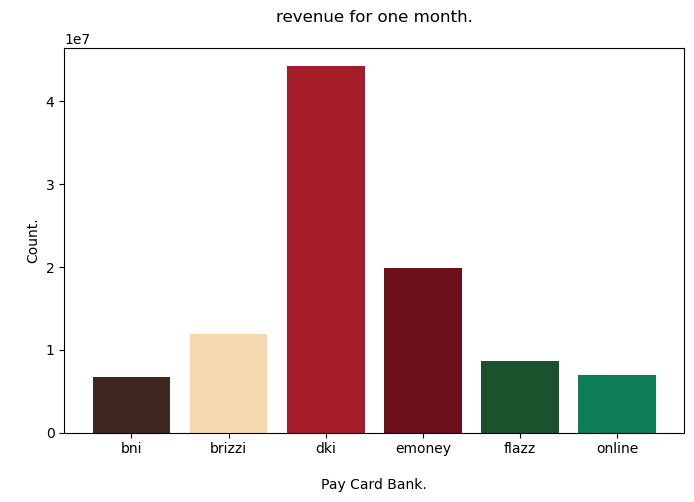

In [83]:
plt.figure(figsize=(8,5))

# create bar plot
plt.bar(total_payAmount['payCardBank'], total_payAmount['payAmount'], color=['#412722', '#F6D8AE', '#A51C28', '#6B0F1A', '#1B512D', '#0C7C59'])

plt.xlabel('\nPay Card Bank.', size=10)
plt.ylabel('\nCount.', size=10)
plt.title('revenue for one month.\n', size=12)
plt.show()

* Based on Age.

In [82]:
amount_age = data.groupby('ageClasification').payAmount.sum().reset_index()
amount_age

,ageClasification,payAmount
0,Adult,56214500.0
1,Child,3303500.0
2,Elderly,11949000.0
3,Teenager,26821500.0


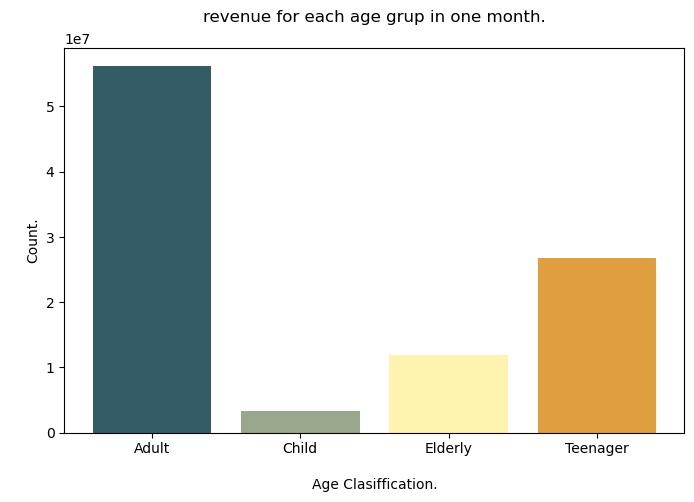

In [86]:
plt.figure(figsize=(8,5))

# create bar plot
plt.bar(amount_age['ageClasification'], amount_age['payAmount'], color=['#335c67', '#99a88c', '#fff3b0', '#e09f3e'])

plt.xlabel('\nAge Clasiffication.', size=10)
plt.ylabel('\nCount.', size=10)
plt.title('revenue for each age grup in one month.\n', size=12)
plt.show()

* Revenue each day in one month.

In [60]:
# Make new column filled only with a date.
data['Date'] = data['tapInTime'].dt.date
data

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,ageClasification,Date
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Teenager,2023-04-03
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Adult,2023-04-03
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Adult,2023-04-03
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Adult,2023-04-03
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Adult,2023-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,Teenager,2023-04-21
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,Elderly,2023-04-18
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,Elderly,2023-04-04
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,Elderly,2023-04-15


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36474 entries, 0 to 37899
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           36474 non-null  object        
 1   payCardID         36474 non-null  int64         
 2   payCardBank       36474 non-null  object        
 3   payCardName       36474 non-null  object        
 4   payCardSex        36474 non-null  object        
 5   payCardBirthDate  36474 non-null  int64         
 6   corridorID        36474 non-null  object        
 7   corridorName      36474 non-null  object        
 8   direction         36474 non-null  float64       
 9   tapInStops        36474 non-null  object        
 10  tapInStopsName    36474 non-null  object        
 11  tapInStopsLat     36474 non-null  float64       
 12  tapInStopsLon     36474 non-null  float64       
 13  stopStartSeq      36474 non-null  int64         
 14  tapInTime         3647

In [62]:
# Change data type of "Date" to datetime.
data['Date'] = pd.to_datetime(data['Date'])

# Make new column named "Day".
data['Day'] = data['Date'].dt.day_name()
data

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,ageClasification,Date,Day
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Teenager,2023-04-03,Monday
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Adult,2023-04-03,Monday
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Adult,2023-04-03,Monday
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Adult,2023-04-03,Monday
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Adult,2023-04-03,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,Teenager,2023-04-21,Friday
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,Elderly,2023-04-18,Tuesday
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,Elderly,2023-04-04,Tuesday
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,Elderly,2023-04-15,Saturday


In [63]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

revenue_day = data.groupby('Day').payAmount.sum().reindex(days_order).reset_index()
revenue_day

,Day,payAmount
0,Monday,17882000.0
1,Tuesday,17845500.0
2,Wednesday,17788500.0
3,Thursday,17792000.0
4,Friday,18024500.0
5,Saturday,4416500.0
6,Sunday,4539500.0


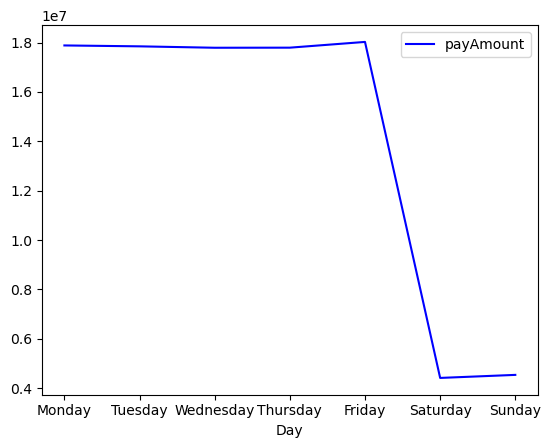

In [64]:
ax = plt.gca()

revenue_day.plot(kind='line',x='Day',y='payAmount', color='blue', ax=ax)

plt.show()

**Traffic.**

* The Most Crowded Corridor or Route.

In [65]:
koridor_10 = data['corridorName'].value_counts().head(10).reset_index()
koridor_10

,index,corridorName
0,Cibubur - Balai Kota,394
1,Ciputat - CSW,383
2,Harmoni - Jakarta International Stadium,343
3,Kalideres - Bundaran HI via Veteran,341
4,Pulo Gadung - Monas,339
5,Kampung Rambutan - Pondok Gede,335
6,Rusun Pondok Bambu - Walikota Jakarta Timur,332
7,Kebayoran Lama - Tanah Abang,330
8,Rusun Rawa Bebek - Kodamar,317
9,Pasar Minggu - Tanah Abang,308


In [66]:
koridor_10.columns = ['corridorName', 'Counts']
koridor_10

,corridorName,Counts
0,Cibubur - Balai Kota,394
1,Ciputat - CSW,383
2,Harmoni - Jakarta International Stadium,343
3,Kalideres - Bundaran HI via Veteran,341
4,Pulo Gadung - Monas,339
5,Kampung Rambutan - Pondok Gede,335
6,Rusun Pondok Bambu - Walikota Jakarta Timur,332
7,Kebayoran Lama - Tanah Abang,330
8,Rusun Rawa Bebek - Kodamar,317
9,Pasar Minggu - Tanah Abang,308


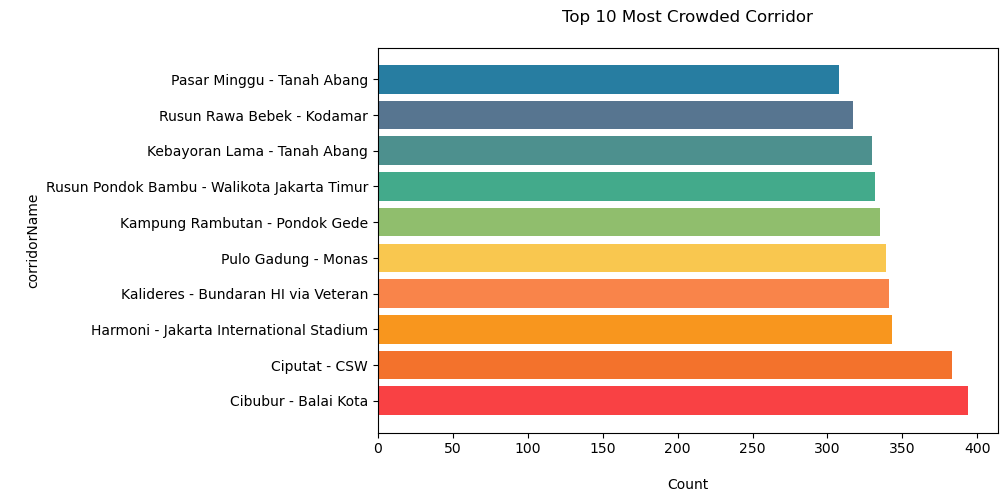

In [67]:
plt.figure(figsize=(8,5))

# create bar plot
plt.barh(koridor_10['corridorName'], koridor_10['Counts'], color=['#F94144', '#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#90BE6D', '#43AA8B','#4D908E', '#577590', '#277DA1'])

plt.xlabel('\nCount', size=10)
plt.ylabel('\ncorridorName', size=10)
plt.title('Top 10 Most Crowded Corridor\n', size=12)
plt.show()

* Most Used Corridor by Female.

In [68]:
female_corr = data[(data['payCardSex'] == "F")]
female_corr_5 = female_corr['corridorName'].value_counts().reset_index().head(5)
female_corr_5

,index,corridorName
0,Pasar Minggu - Tanah Abang,224
1,Rusun Rawa Bebek - Kodamar,217
2,Poris Plawad - Bundaran Senayan,216
3,Cilangkap - Cililitan,200
4,Terminal Tanah Merah - Pulo Gadung,199


In [69]:
female_corr_5.columns = ['corridorName', 'Counts']
female_corr_5

,corridorName,Counts
0,Pasar Minggu - Tanah Abang,224
1,Rusun Rawa Bebek - Kodamar,217
2,Poris Plawad - Bundaran Senayan,216
3,Cilangkap - Cililitan,200
4,Terminal Tanah Merah - Pulo Gadung,199


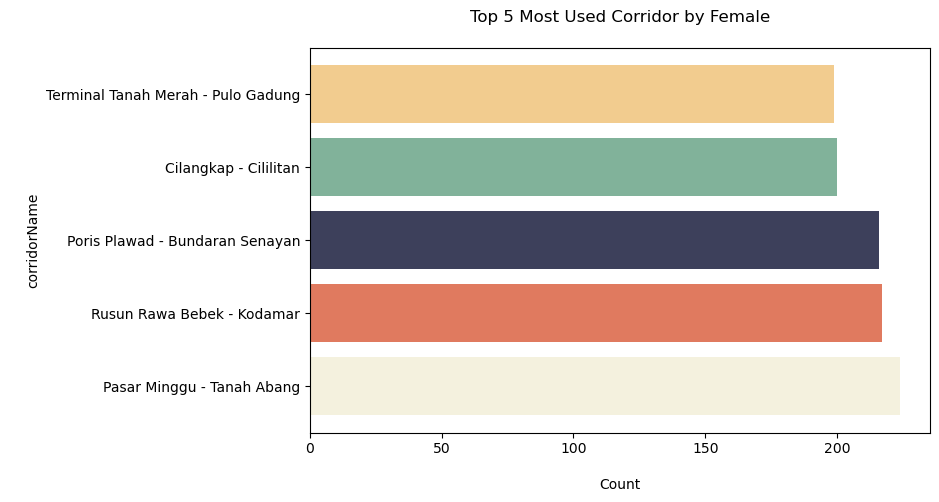

In [70]:
plt.figure(figsize=(8,5))

# create bar plot
plt.barh(female_corr_5['corridorName'], female_corr_5['Counts'], color=['#f4f1de', '#e07a5f', '#3d405b', '#81b29a', '#f2cc8f'])

plt.xlabel('\nCount', size=10)
plt.ylabel('\ncorridorName', size=10)
plt.title('Top 5 Most Used Corridor by Female\n', size=12)
plt.show()

* Most Crowded Halte.

    * Based on TapInStops.

In [71]:
halte_in = data.tapInStopsName.value_counts().reset_index().head()
halte_in


,index,tapInStopsName
0,Penjaringan,235
1,Garuda Taman Mini,203
2,BKN,163
3,BNN LRT,150
4,Pejaten,146


In [72]:
halte_in.columns = ['tapInStopsName', 'Counts']
halte_in

,tapInStopsName,Counts
0,Penjaringan,235
1,Garuda Taman Mini,203
2,BKN,163
3,BNN LRT,150
4,Pejaten,146


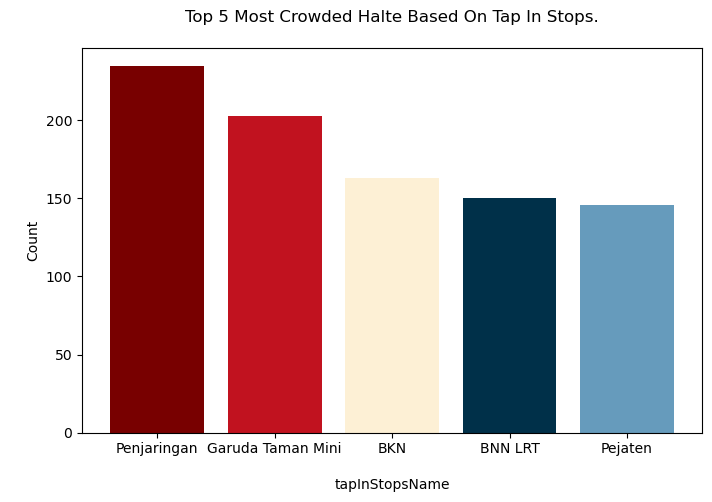

In [73]:
plt.figure(figsize=(8,5))

# create bar plot
plt.bar(halte_in['tapInStopsName'], halte_in['Counts'], color=['#780000', '#c1121f', '#fdf0d5', '#003049', '#669bbc'])

plt.xlabel('\ntapInStopsName', size=10)
plt.ylabel('\nCount', size=10)
plt.title('Top 5 Most Crowded Halte Based On Tap In Stops.\n', size=12)
plt.show()

    * Based on TapOutStops.

In [74]:
halte_out = data.tapOutStopsName.value_counts().reset_index().head()
halte_out

,index,tapOutStopsName
0,BKN,316
1,Penjaringan,265
2,Term. Senen,196
3,Monas,167
4,Term. Kampung Rambutan,164


In [75]:
halte_out.columns = ['tapOutStopsName', 'Counts']
halte_out

,tapOutStopsName,Counts
0,BKN,316
1,Penjaringan,265
2,Term. Senen,196
3,Monas,167
4,Term. Kampung Rambutan,164


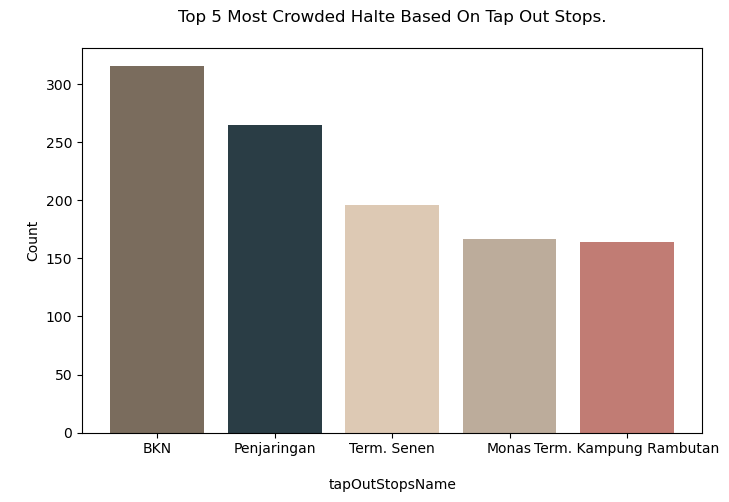

In [76]:
plt.figure(figsize=(8,5))

# create bar plot
plt.bar(halte_out['tapOutStopsName'], halte_out['Counts'], color=['#7a6c5d', '#2a3d45', '#ddc9b4', '#bcac9b', '#c17c74'])

plt.xlabel('\ntapOutStopsName', size=10)
plt.ylabel('\nCount', size=10)
plt.title('Top 5 Most Crowded Halte Based On Tap Out Stops.\n', size=12)
plt.show()

**Rush Hour.**

In [77]:
# Make new column filled with hours.

data['tapInHour'] = data['tapInTime'].dt.hour
data

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,ageClasification,Date,Day,tapInHour
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Teenager,2023-04-03,Monday,5
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Adult,2023-04-03,Monday,5
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Adult,2023-04-03,Monday,5
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Adult,2023-04-03,Monday,5
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Adult,2023-04-03,Monday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,Teenager,2023-04-21,Friday,18
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,Elderly,2023-04-18,Tuesday,21
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,Elderly,2023-04-04,Tuesday,10
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,Elderly,2023-04-15,Saturday,19


In [78]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

rush_hour = pd.crosstab(data['Day'], data['tapInHour']).reindex(days_order)
rush_hour

tapInHour,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Day,,,,,,,,,,,,,,,,,
Monday,600,1107,524,502,489,14,26,16,35,1,26,600,1008,419,441,430,366
Tuesday,591,1092,525,494,496,16,26,28,20,2,28,593,1014,416,415,440,395
Wednesday,592,1077,478,514,517,28,26,31,17,1,31,611,1017,429,435,389,381
Thursday,621,1070,485,512,503,20,27,21,26,3,37,598,986,451,406,409,399
Friday,619,1084,483,527,513,23,29,23,26,1,34,621,1002,413,441,428,378
Saturday,110,91,91,116,103,88,91,109,99,79,116,111,138,106,109,103,75
Sunday,101,98,107,114,93,98,102,99,115,80,114,101,116,98,117,127,71


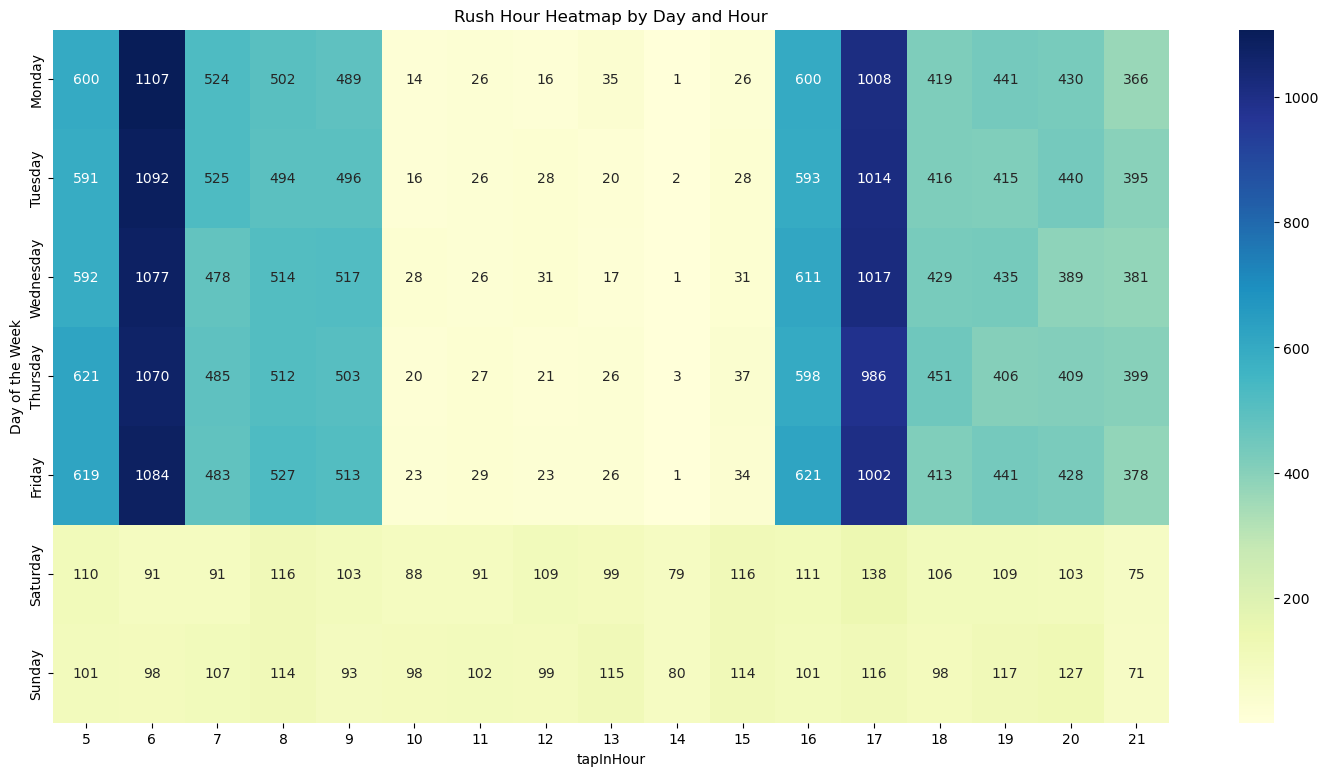

In [79]:
plt.figure(figsize=(18, 9))
sns.heatmap(rush_hour, annot=True, annot_kws={'size':10}, fmt='d', cmap='YlGnBu', xticklabels=True)
plt.title('Rush Hour Heatmap by Day and Hour')
plt.xlabel('tapInHour')
plt.ylabel('Day of the Week')
plt.show()

# **Conclusion.**

**Passenger Distribution.**

- Female passengers are 6.6% more than male.
- The largest age group of Transjakarta passengers at 0.54% is adult, with an age range of 26-45 years, followed by teenager, elderly and finally child.
- It can be said that most Transjakarta users are workers, students and school children.
- The DKI card is the favorite card of Transjakarta passengers for payment with a total of 18,015 times transactions during one month. There is an "online" payment type that gets 5th place, this type of payment is done through an application called "Tije".
- Because the adult age group as the most Transjakarta passengers, they are ranked first in each type of payment.

**Revenue.**

- In one month of April 2023, Transjakarta's revenue was 98,288,500 rupiah and the DKI card was the largest contributor with a total revenue of 44,260,000 rupiah or equivalent to 0.45%.
- When viewed by day, Monday to Friday has a total income value that is not so different, while on Saturday and Sunday, there is a considerable difference. This can be because many passengers work, go to school or do their activities during weekdays and Friday is the day with the highest total revenue value, amounting to 18,024,500 rupiah or equivalent to 0.18%.

**Traffic.**

- In general, it can be seen that the corridors or routes that are crowded with passengers are Cibubur - City Hall, Ciputat - CSW, Harmoni - Jakarta International Stadium, Kalideres - HI Roundabout via Veteran, Pulo Gadung - Monas, Kampung Rambutan - Pondok Gede, Pondok Bambu Flat - East Jakarta Mayor, Kebayoran Lama - Tanah Abang, Rusun Rawa Bebek - Kodamar and Pasar Minggu - Tanah Abang, with a range of 308 to 394 passengers per corridor for one month.
- For female passengers, they more often ride the Pasar Minggu - Tanah Abang, Rawa Bebek Flat - Kodamar, Poris Plawad - Senayan Roundabout, Cilangkap - Cililitan and Tanah Merah Terminal - Pulo Gadung routes, with a range of 199 to 224 female passengers per corridor during the month.
- After discussing the routes, we will now discuss the bus stops. The most crowded stops based on their tapInStops (passenger boarding points) are Penjaringan, Garuda Taman Mini, BKN, BNN LRT, and Pejaten, with the number of passengers per stop 146 to 235. While based on the tapOutStops (passenger drop-off points) are BKN, Penjaringan, Pasar Senen Terminal, Monas and Kampung Rambutan Terminal, with the number of passengers per stop 164 to 316 for one month. It can be said that many of the prospective passengers boarded from the East, North and South Jakarta areas, while many finished the trip in the Central Jakarta and South Jakarta areas, where there are many offices in the area.
- Next, the rush hour is depicted through a heat map. Rush hour is divided into two times, morning and afternoon. The morning rush hour occurs at 5am to 9am because at that time people start leaving for their respective activities, while the afternoon rush hour occurs at 4pm to 5pm because at this time people are already on their way home. In one day the peak point of rush hour occurs at 6am, then from 10am to 3pm, the number of passengers decreases, which means there is no congestion at that time. Another thing is that this rush hour only occurs on Monday to Friday, which is a working day and on weekends people tend not to use Transjakarta so the number of passengers is not dense.

# **Recommendations.**

 - The number of female passengers who are more than men indicates that there are still many female who trust Transjakarta as their mode of transportation, so their safety must be maintained. Pink buses are one of the solutions that Transjakarta has launched since 2016, but there are still many routes that do not have Pink Buses including routes that are often used by female. In addition, the presence of CCTV and officers on guard in the bus can be an effort to minimize the occurrence of sexual violence.
- Not only sexual violence, other crimes such as pickpocketing can also occur on the bus, and CCTV and officers can be a solution.
- As is well known, at certain times there is a surge in the number of passengers, this triggers a buildup of passengers, moreover there are still many bus stops that only have one gate for each tap in and tap out. The impact of this buildup is that prospective passengers have to queue long and take more time. It is advisable to add gates, especially at crowded bus stops.
- Passengers have to jostle during peak hours, and this uncomfortable condition can be exploited by criminals. Another thing that can be done is to limit the number of passengers on the bus, for example one bus is filled with 30 people and increase the number of fleets so that prospective passengers do not wait long at the bus stop.
- Public transportation such as Transjakarta must maintain the comfort of its passengers, with high operating hours, the performance of the bus may also decline. To avoid this, regular checks can be carried out so that events such as breaking down will not occur.
- Besides using a card, Transjakarta payments can also be made online or through the "Tije" application. Based on analysis, online users are still small, including adult and teenager groups. Passengers with these age groups can be said to be digitally literate, so Transjakarta can take advantage of this to increase the use of applications. One way to attract them is with rewards, for example in one month using Transjakarta with payment through online 5 times, then they will get a free trip reward. It can also be on special days such as the birthday of the application user and given a free trip on that day.

In [80]:
data

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,ageClasification,Date,Day,tapInHour
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Teenager,2023-04-03,Monday,5
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Adult,2023-04-03,Monday,5
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Adult,2023-04-03,Monday,5
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Adult,2023-04-03,Monday,5
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Adult,2023-04-03,Monday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,Teenager,2023-04-21,Friday,18
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,Elderly,2023-04-18,Tuesday,21
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,Elderly,2023-04-04,Tuesday,10
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,Elderly,2023-04-15,Saturday,19


In [81]:
data.to_csv('Transjakarta..csv', index=False)

# **Tableau.**

Data visualization in the form of stories in [Tableau](https://public.tableau.com/views/Transjakarta_/Story2?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)